<a href="https://colab.research.google.com/github/BrunoBerval/dio_project6/blob/main/recomendacao_por_semelhanca_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recomendação por Semelhança de Imagens
Este projeto tem como objetivo implementar um sistema de busca de imagens semelhantes para um e-commerce. Utilizando técnicas de aprendizado profundo, mais especificamente o modelo VGG16 pré-treinado, o sistema extrai características visuais de imagens de produtos e compara essas características para encontrar itens semelhantes. Através da distância euclidiana, o sistema pode identificar produtos que são visualmente similares à imagem fornecida, oferecendo uma maneira eficiente e automatizada de recomendar produtos dentro de uma mesma categoria visando melhorar a experiência do usuário.



---
#Image Similarity Recommendation
This project aims to implement a similar image search system for an e-commerce platform. Using deep learning techniques, specifically the pre-trained VGG16 model, the system extracts visual features from product images and compares these features to find similar items. By using Euclidean distance, the system can identify products that are visually similar to the provided image, offering an efficient and automated way to recommend products within the same category, aiming to enhance the user experience.


In [11]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carrega o modelo VGG16 pré-treinado sem a camada final de classificação. O modelo é usado para extrair características das imagens, como formas e texturas.


---
Loads the pre-trained VGG16 model without the final classification layer. The model is used to extract features from images, such as shapes and textures.


In [3]:
def load_model():
    base_model = VGG16(weights='imagenet', include_top=False)
    return Model(inputs=base_model.input, outputs=base_model.output)

Recebe o caminho de uma imagem, carrega e processa a imagem para o modelo VGG16, e extrai as características profundas (features). Essas características ajudam a representar a imagem de forma numérica para comparar com outras.


---

Receives the path of an image, loads and processes the image for the VGG16 model, and extracts the deep features. These features help represent the image numerically for comparison with others.

In [4]:
def extract_deep_features(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    features = model.predict(img).flatten()
    return features / np.linalg.norm(features)

Percorre todas as imagens de uma categoria no diretório, extrai suas características e as armazena em um dicionário. Cria uma "base de dados" de imagens características para comparar com a imagem de entrada.


---

Goes through all the images in a category within the directory, extracts their features, and stores them in a dictionary. It creates a "database" of feature images to compare with the input image.


In [5]:
def index_category_images(category_path, model):
    feature_vectors = {}

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        if os.path.isfile(img_path):
            features = extract_deep_features(img_path, model)
            feature_vectors[img_name] = features

    return feature_vectors

Compara a imagem de entrada com as imagens da categoria, encontra as N imagens mais semelhantes (baseado nas características extraídas e a distância euclidiana). Retorna as imagens mais semelhantes àquela fornecida, ajudando a sugerir produtos semelhantes.



---

Compares the input image with the images in the category, finds the top N most similar images (based on the extracted features and Euclidean distance). It returns the most similar images to the provided one, helping to suggest similar products.

In [6]:
def find_similar_images(input_img_path, category_path, model, top_n=4):
    input_features = extract_deep_features(input_img_path, model)
    indexed_images = index_category_images(category_path, model)

    distances = []
    for img_name, features in indexed_images.items():
        dist = euclidean(input_features, features)
        distances.append((img_name, dist))

    distances.sort(key=lambda x: x[1])
    return [img[0] for img in distances[:top_n]]

Testando.


---
Testing.


In [10]:
model = load_model()
category = "men_t-shirt"
dataset_path = "/content/drive/MyDrive/Sistema_de_recomendacao_por_imagens/data_products_ecommerce"
input_image = "/content/drive/MyDrive/Sistema_de_recomendacao_por_imagens/data_products_ecommerce/men_t-shirt/male_t-shirt (94).jpg"

category_path = os.path.join(dataset_path, category)
similar_images = find_similar_images(input_image, category_path, model)

print("Imagens mais semelhantes:", similar_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━

Exibe as imagens


---

Displays the images.

In [21]:
def plot_similar_images(input_image, similar_images):
    plt.figure(figsize=(10, 5))

    # Exibir imagem de entrada
    plt.subplot(1, len(similar_images) + 1, 1)
    img = cv2.imread(input_image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converter de BGR para RGB
    plt.imshow(img)
    plt.title("Imagem de Entrada")
    plt.axis("off")

    # Exibir imagens semelhantes
    for i, img_path in enumerate(similar_images):
      plt.subplot(1, len(similar_images) + 1, i + 2)
      img = cv2.imread(dataset_path+"/"+category+"/"+img_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.imshow(img)
      plt.title(f"Similar {i+1}")
      plt.axis("off")

    plt.show()


Resultado final.


---
FInal result.


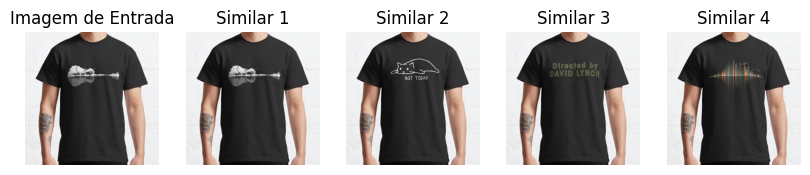

In [22]:
plot_similar_images(input_image, similar_images)